# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

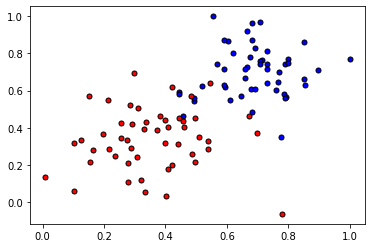

In [4]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [9]:
# Implement the following functions

# Activation (sigmoid) function
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [10]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            print(x, y, weights, bias, learnrate)
        
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

[ 0.78051  -0.063669] 1 [-0.53076476  0.93080519] 0 0.01
[0.28774 0.29139] 1 [-0.52595511  0.93041285] 0.006162190693998755 0.01
[0.40714 0.17878] 1 [-0.52460688  0.93177818] 0.01084776398107077 0.01
[0.2923 0.4217] 1 [-0.52253438  0.93268824] 0.015938147578158493 0.01
[0.50922 0.35256] 1 [-0.52125931  0.93452778] 0.020300351077118972 0.01
[0.27785 0.10802] 1 [-0.51882052  0.93621628] 0.02508962148060879 0.01
[0.27527 0.33223] 1 [-0.51741881  0.93676123] 0.030134456717841172 0.01
[0.43999 0.31245] 1 [-0.5161789  0.9382577] 0.03463877827386064 0.01
[0.33557 0.42984] 1 [-0.51408961  0.93974137] 0.03938728109370719 0.01
[0.23448 0.24986] 1 [-0.51263757  0.94160132] 0.04371435708306242 0.01
[0.0084492 0.13658  ] 1 [-0.51155805  0.94275164] 0.04831823993015341 0.01
[0.12419 0.33595] 1 [-0.51151945  0.9433757 ] 0.05288741837788912 0.01
[0.25644 0.42624] 1 [-0.51099286  0.9448002 ] 0.057127626750906914 0.01
[0.4591  0.40426] 1 [-0.50991957  0.94658415] 0.061312952429730894 0.01
[0.44547 0.451

[0.65912 0.71548] 0 [-0.83760994  0.5724743 ] -0.0006342983832329525 0.01
[0.70938 0.74041] 0 [-0.8406701   0.56915248] -0.005277093331530876 0.01
[0.59154 0.62927] 0 [-0.84389824  0.56578313] -0.009827745292532553 0.01
[0.45829 0.4641 ] 0 [-0.84663012  0.562877  ] -0.01444599726052942 0.01
[0.79982 0.74847] 0 [-0.84876005  0.56072008] -0.019093540545057595 0.01
[0.60974 0.54757] 0 [-0.8522063   0.55749508] -0.02340232836629476 0.01
[0.68127 0.86985] 0 [-0.85489427  0.55508118] -0.027810715156447896 0.01
[0.76694 0.64736] 0 [-0.85808395  0.55100857] -0.0324926771876132 0.01
[0.69048 0.83058] 0 [-0.86128435  0.54830718] -0.03666561983445765 0.01
[0.68122 0.96541] 0 [-0.8644338   0.54451869] -0.041226870540601465 0.01
[0.73229 0.64245] 0 [-0.86766224  0.53994342] -0.04596607574832425 0.01
[0.76145 0.60138] 0 [-0.87071703  0.5372634 ] -0.05013763454720867 0.01
[0.58985 0.86955] 0 [-0.87379105  0.53483559] -0.054174697647056395 0.01
[0.73145 0.74516] 0 [-0.87658633  0.53071483] -0.05891365

[0.65912 0.71548] 0 [-1.05907679  0.2980601 ] 0.15308577856217617 0.01
[0.70938 0.74041] 0 [-1.06183075  0.29507067] 0.14890754915870605 0.01
[0.59154 0.62927] 0 [-1.06470171  0.29207412] 0.1448604076091852 0.01
[0.45829 0.4641 ] 0 [-1.06721737  0.289398  ] 0.14060766765760577 0.01
[0.79982 0.74847] 0 [-1.06926437  0.28732505] 0.13614107459961963 0.01
[0.60974 0.54757] 0 [-1.07227645  0.28450635] 0.13237511924939355 0.01
[0.68127 0.86985] 0 [-1.07477391  0.28226354] 0.12827918789223342 0.01
[0.76694 0.64736] 0 [-1.07757628  0.27868545] 0.12416573086301182 0.01
[0.69048 0.83058] 0 [-1.0804325   0.27627457] 0.12044155869386856 0.01
[0.68122 0.96541] 0 [-1.08320994  0.27293358] 0.11641907918277428 0.01
[0.73229 0.64245] 0 [-1.08601279  0.26896144] 0.11230462280104936 0.01
[0.76145 0.60138] 0 [-1.08875999  0.26655128] 0.10855310341799626 0.01
[0.58985 0.86955] 0 [-1.0915279   0.26436523] 0.10491805590330151 0.01
[0.73145 0.74516] 0 [-1.09402502  0.260684  ] 0.10068456725599587 0.01
[0.7702

[0.58935 0.71582] 0 [-1.23463903  0.07361507] 0.36270562383867866 0.01
[0.56846 0.7406 ] 0 [-1.23712944  0.07059023] 0.3584799278394523 0.01
[0.65912 0.71548] 0 [-1.23955899  0.06742496] 0.3542060073766991 0.01
[0.70938 0.74041] 0 [-1.24218108  0.06457866] 0.35022784125187956 0.01
[0.59154 0.62927] 0 [-1.24488745  0.06175391] 0.3464127221954961 0.01
[0.45829 0.4641 ] 0 [-1.24733115  0.05915434] 0.34228163336787065 0.01
[0.79982 0.74847] 0 [-1.24939206  0.05706731] 0.3377846861800228 0.01
[0.60974 0.54757] 0 [-1.25219188  0.05444724] 0.334284121263484 0.01
[0.68127 0.86985] 0 [-1.2546397  0.052249 ] 0.33026958908889537 0.01
[0.76694 0.64736] 0 [-1.25724543  0.04892199] 0.3264447770742121 0.01
[0.69048 0.83058] 0 [-1.25995231  0.04663716] 0.32291532212689134 0.01
[0.68122 0.96541] 0 [-1.26254567  0.04351761] 0.31915944927266116 0.01
[0.73229 0.64245] 0 [-1.26511931  0.0398703 ] 0.315381456195824 0.01
[0.76145 0.60138] 0 [-1.26773858  0.03757237] 0.31180463368574945 0.01
[0.58985 0.86955]

[0.39748 0.31902] 1 [-1.3215417  -0.06064009] 0.6770422674843898 0.01
[0.5533 1.    ] 0 [-1.31968568 -0.05915044] 0.6817117241001989 0.01
[0.44274 0.59205] 0 [-1.32230346 -0.06388165] 0.6769805167201546 0.01
[0.85176 0.6612 ] 0 [-1.32457661 -0.06692139] 0.6718462421254957 0.01
[0.60436 0.86605] 0 [-1.3277911  -0.06941672] 0.6680723007006464 0.01
[0.68243 0.48301] 0 [-1.33051994 -0.07332716] 0.6635570480356241 0.01
[1.      0.76815] 0 [-1.33345774 -0.07540647] 0.6592521362094942 0.01
[0.72989 0.8107 ] 0 [-1.33670502 -0.07790087] 0.6560048593255784 0.01
[0.67377 0.77975] 0 [-1.33966437 -0.08118787] 0.6519503346011376 0.01
[0.78761 0.58177] 0 [-1.34250865 -0.08447953] 0.6477289027936484 0.01
[0.71442 0.7668 ] 0 [-1.34555884 -0.08673257] 0.6438561784303233 0.01
[0.49379 0.54226] 0 [-1.3484535  -0.08983946] 0.6398044195894506 0.01
[0.78974 0.74233] 0 [-1.3508302  -0.09244945] 0.6349912445182357 0.01
[0.67905 0.60921] 0 [-1.35381097 -0.09525128] 0.6312168750716572 0.01
[0.6642  0.72519] 0 [-

[0.45829 0.4641 ] 0 [-1.5300002 -0.3053406] 0.6925713985195305 0.01
[0.79982 0.74847] 0 [-1.53211975 -0.30748702] 0.6879464948848063 0.01
[0.60974 0.54757] 0 [-1.53465513 -0.30985963] 0.6847765495461199 0.01
[0.68127 0.86985] 0 [-1.53707193 -0.31203   ] 0.6808128988339067 0.01
[0.76694 0.64736] 0 [-1.53942743 -0.31503752] 0.6773553848640277 0.01
[0.69048 0.83058] 0 [-1.54195994 -0.31717517] 0.6740532856732593 0.01
[0.68122 0.96541] 0 [-1.54432188 -0.32001634] 0.6706325753672309 0.01
[0.73229 0.64245] 0 [-1.54659686 -0.32324041] 0.6672929950469015 0.01
[0.76145 0.60138] 0 [-1.54907084 -0.32541087] 0.6639145847901418 0.01
[0.58985 0.86955] 0 [-1.55157835 -0.32739125] 0.6606215146455933 0.01
[0.73145 0.74516] 0 [-1.55375112 -0.33059433] 0.6569379173180957 0.01
[0.77029 0.7014 ] 0 [-1.55613634 -0.33302426] 0.6536769642527154 0.01
[0.73156 0.71782] 0 [-1.55855987 -0.33523104] 0.6505307095811108 0.01
[0.44556 0.57991] 0 [-1.56093841 -0.3375649 ] 0.6472793874599365 0.01
[0.85275 0.85987] 0 [-

[0.62091 0.80424] 0 [-1.66329695 -0.48065662] 0.9070704467150041 0.01
[0.79057 0.56108] 0 [-1.66562329 -0.48366983] 0.9033237857693027 0.01
[0.58935 0.71582] 0 [-1.66827313 -0.48555046] 0.8999719787753009 0.01
[0.56846 0.7406 ] 0 [-1.6705948  -0.48837035] 0.8960326053831743 0.01
[0.65912 0.71548] 0 [-1.6728552  -0.49131525] 0.8920562355433196 0.01
[0.70938 0.74041] 0 [-1.67524824 -0.49391291] 0.8884255776601753 0.01
[0.59154 0.62927] 0 [-1.67765637 -0.49642637] 0.8850308846409837 0.01
[0.45829 0.4641 ] 0 [-1.68000227 -0.4989219 ] 0.8810651337072511 0.01
[0.79982 0.74847] 0 [-1.68215593 -0.50110286] 0.8763658024108384 0.01
[0.60974 0.54757] 0 [-1.68456073 -0.50335327] 0.8733591175385397 0.01
[0.68127 0.86985] 0 [-1.68696475 -0.50551217] 0.8694164359493484 0.01
[0.76694 0.64736] 0 [-1.6891958 -0.5083608] 0.8661415851405116 0.01
[0.69048 0.83058] 0 [-1.69164219 -0.51042575] 0.8629517838820803 0.01
[0.68122 0.96541] 0 [-1.69388904 -0.5131285 ] 0.8596977355986166 0.01
[0.73229 0.64245] 0 [-

[0.62091 0.80424] 0 [-1.806727   -0.66552402] 1.0859412080871225 0.01
[0.79057 0.56108] 0 [-1.80896836 -0.66842716] 1.082331411526927 0.01
[0.58935 0.71582] 0 [-1.81155171 -0.6702606 ] 1.0790637012981963 0.01
[0.56846 0.7406 ] 0 [-1.81382074 -0.67301654] 1.075213657055275 0.01
[0.65912 0.71548] 0 [-1.81602828 -0.67589257] 1.0713302846183 0.01
[0.70938 0.74041] 0 [-1.81834992 -0.67841273] 1.0678079539690128 0.01
[0.59154 0.62927] 0 [-1.82066552 -0.68082961] 1.0645436985670589 0.01
[0.45829 0.4641 ] 0 [-1.82298158 -0.6832934 ] 1.0606283818026891 0.01
[0.79982 0.74847] 0 [-1.82516777 -0.6855073 ] 1.0558580758102674 0.01
[0.60974 0.54757] 0 [-1.82745176 -0.68764466] 1.0530024399124844 0.01
[0.68127 0.86985] 0 [-1.82984356 -0.68979259] 1.0490797905905027 0.01
[0.76694 0.64736] 0 [-1.83195923 -0.6924939 ] 1.045974300336766 0.01
[0.69048 0.83058] 0 [-1.83432495 -0.69449075] 1.042889684434622 0.01
[0.68122 0.96541] 0 [-1.83646487 -0.69706487] 1.039790509680993 0.01
[0.73229 0.64245] 0 [-1.8384

[0.65973 0.66666] 0 [-1.9340763  -0.83360973] 1.269320977277058 0.01
[0.64574 0.56845] 0 [-1.9364711  -0.83602969] 1.2656910110894453 0.01
[0.89639 0.7085 ] 0 [-1.93897001 -0.8382295 ] 1.261821169243278 0.01
[0.85476 0.63167] 0 [-1.94125918 -0.84003884] 1.2592674003660067 0.01
[0.62091 0.80424] 0 [-1.94367635 -0.84182513] 1.2564395135925144 0.01
[0.79057 0.56108] 0 [-1.94583768 -0.84462463] 1.2529585967179135 0.01
[0.58935 0.71582] 0 [-1.94835807 -0.84641338] 1.2497705365258758 0.01
[0.56846 0.7406 ] 0 [-1.95057705 -0.84910854] 1.2460054031893966 0.01
[0.65912 0.71548] 0 [-1.95273436 -0.85191912] 1.2422103994299911 0.01
[0.70938 0.74041] 0 [-1.95498853 -0.85436604] 1.2387904281619824 0.01
[0.59154 0.62927] 0 [-1.9572173  -0.85669231] 1.2356485664553096 0.01
[0.45829 0.4641 ] 0 [-1.95950477 -0.85912568] 1.2317815890107815 0.01
[0.79982 0.74847] 0 [-1.96172182 -0.86137084] 1.2269439321314886 0.01
[0.60974 0.54757] 0 [-1.96389371 -0.86340328] 1.2242284676230173 0.01
[0.68127 0.86985] 0 [-

[0.40714 0.17878] 1 [-2.08540614 -1.01992489] 1.313950735995279 0.01
[0.2923 0.4217] 1 [-2.08365614 -1.01915644] 1.318249007738038 0.01
[0.50922 0.35256] 1 [-2.0823975  -1.01734062] 1.3225549722912384 0.01
[0.27785 0.10802] 1 [-2.07972863 -1.01549281] 1.327796077883028 0.01
[0.27527 0.33223] 1 [-2.07876952 -1.01511994] 1.3312479782953572 0.01
[0.43999 0.31245] 1 [-2.07767919 -1.013804  ] 1.3352089068227682 0.01
[0.33557 0.42984] 1 [-2.07559385 -1.01232314] 1.3399484234158914 0.01
[0.23448 0.24986] 1 [-2.07409013 -1.01039697] 1.3444295372556005 0.01
[0.0084492 0.13658  ] 1 [-2.07326228 -1.00951483] 1.3479600834518068 0.01
[0.12419 0.33595] 1 [-2.07324261 -1.00919687] 1.3502880917885611 0.01
[0.25644 0.42624] 1 [-2.07284521 -1.00812183] 1.353488090483512 0.01
[0.4591  0.40426] 1 [-2.07181129 -1.00640331] 1.3575199064429715 0.01
[0.44547 0.45117] 1 [-2.06951522 -1.00438151] 1.3625211495893692 0.01
[0.42218 0.20118] 1 [-2.06727391 -1.00211152] 1.3675524806784085 0.01
[0.49563 0.21445] 1 [-

[0.51912 0.62359] 0 [-2.21428486 -1.17947325] 1.467426783931431 0.01
[ 0.78051  -0.063669] 1 [-2.21634629 -1.18194953] 1.4634557774402128 0.01
[0.28774 0.29139] 1 [-2.21207184 -1.18229821] 1.4689322549899044 0.01
[0.40714 0.17878] 1 [-2.21097733 -1.18118981] 1.4727360898879494 0.01
[0.2923 0.4217] 1 [-2.20930551 -1.1804557 ] 1.4768423316532995 0.01
[0.50922 0.35256] 1 [-2.20808531 -1.17869533] 1.481016797800818 0.01
[0.27785 0.10802] 1 [-2.2054642  -1.17688059] 1.4861641182230192 0.01
[0.27527 0.33223] 1 [-2.20457052 -1.17653315] 1.4893805094133354 0.01
[0.43999 0.31245] 1 [-2.20352586 -1.17527232] 1.4931755617730007 0.01
[0.33557 0.42984] 1 [-2.20149763 -1.17383202] 1.4977852763844302 0.01
[0.23448 0.24986] 1 [-2.20003211 -1.1719548 ] 1.5021525153012607 0.01
[0.0084492 0.13658  ] 1 [-2.19925068 -1.17112211] 1.5054851438333845 0.01
[0.12419 0.33595] 1 [-2.19923296 -1.17083575] 1.5075817847371173 0.01
[0.25644 0.42624] 1 [-2.19885878 -1.16982354] 1.510594781049116 0.01
[0.4591  0.40426]

[0.25476 0.34596] 1 [-2.25525916 -1.25133784] 1.7141727925538828 0.01
[0.21726 0.28641] 1 [-2.25441762 -1.25019504] 1.7174760544362078 0.01
[0.67078 0.46538] 1 [-2.25377597 -1.24934918] 1.7204294029528708 0.01
[0.3815 0.4622] 1 [-2.24980408 -1.24659352] 1.726350709847656 0.01
[0.53838 0.32774] 1 [-2.248173   -1.24461741] 1.7306261590012515 0.01
[0.4849  0.26071] 1 [-2.24563215 -1.24307066] 1.7353455943433524 0.01
[0.37095 0.38809] 1 [-2.24359507 -1.24197541] 1.7395466072088466 0.01
[0.54527 0.63911] 1 [-2.24212889 -1.24044148] 1.7434991308646135 0.01
[0.32149 0.12007] 1 [-2.23903423 -1.23681423] 1.749174588896298 0.01
[0.42216 0.61666] 1 [-2.23809225 -1.23646243] 1.7521046196944556 0.01
[0.10194  0.060408] 1 [-2.23602872 -1.23344817] 1.7569926517304602 0.01
[0.15254 0.2168 ] 1 [-2.23583575 -1.23333382] 1.758885687437745 0.01
[0.45558 0.43769] 1 [-2.23546903 -1.23281261] 1.761289766407696 0.01
[0.28488 0.52142] 1 [-2.23342184 -1.23084582] 1.765783346255969 0.01
[0.27633 0.21264] 1 [-2.2

[0.50922 0.35256] 1 [-2.41577008 -1.44458404] 1.7420166150441097 0.01
[0.27785 0.10802] 1 [-2.41322723 -1.44282349] 1.747010225977886 0.01
[0.27527 0.33223] 1 [-2.41243584 -1.44251582] 1.749858498517538 0.01
[0.43999 0.31245] 1 [-2.41146455 -1.44134355] 1.7533869866770484 0.01
[0.33557 0.42984] 1 [-2.40952953 -1.43996943] 1.7577848755082124 0.01
[0.23448 0.24986] 1 [-2.40812625 -1.43817194] 1.7619666428225813 0.01
[0.0084492 0.13658  ] 1 [-2.40741821 -1.43741745] 1.764986272942941 0.01
[0.12419 0.33595] 1 [-2.40740339 -1.43717799] 1.76673955899651 0.01
[0.25644 0.42624] 1 [-2.40706571 -1.4362645 ] 1.7694586775099004 0.01
[0.4591  0.40426] 1 [-2.40612152 -1.43469514] 1.7731405594571912 0.01
[0.44547 0.45117] 1 [-2.40392753 -1.43276322] 1.777919452971889 0.01
[0.42218 0.20118] 1 [-2.40176768 -1.43057573] 1.7827679441877842 0.01
[0.49563 0.21445] 1 [-2.40015487 -1.42980718] 1.7865881363719627 0.01
[0.30848 0.24306] 1 [-2.39803401 -1.42888952] 1.7908672515475677 0.01
[0.39707 0.44438] 1 [-

[0.64574 0.56845] 0 [-2.48545467 -1.53891854] 1.94320702276612 0.01
[0.89639 0.7085 ] 0 [-2.48783739 -1.54101607] 1.939517114743334 0.01
[0.85476 0.63167] 0 [-2.48963581 -1.54243753] 1.9375108208836123 0.01
[0.62091 0.80424] 0 [-2.49166834 -1.54393957] 1.9351329347018593 0.01
[0.79057 0.56108] 0 [-2.49352277 -1.54634155] 1.9321462924358506 0.01
[0.58935 0.71582] 0 [-2.49579692 -1.54795554] 1.9292696990363971 0.01
[0.56846 0.7406 ] 0 [-2.49781875 -1.55041124] 1.9258390954812945 0.01
[0.65912 0.71548] 0 [-2.49977837 -1.55296428] 1.9223918398693118 0.01
[0.70938 0.74041] 0 [-2.50177088 -1.55512716] 1.9193688560105586 0.01
[0.59154 0.62927] 0 [-2.50366927 -1.55710859] 1.916692729770065 0.01
[0.45829 0.4641 ] 0 [-2.50584152 -1.55941939] 1.913020547961076 0.01
[0.79982 0.74847] 0 [-2.50817981 -1.56178732] 1.907918332446238 0.01
[0.60974 0.54757] 0 [-2.50993741 -1.56343209] 1.9057208344292182 0.01
[0.68127 0.86985] 0 [-2.51226704 -1.56552418] 1.9019001475695694 0.01
[0.76694 0.64736] 0 [-2.51

[0.30848 0.24306] 1 [-2.59256774 -1.67665893] 2.030532399198629 0.01
[0.39707 0.44438] 1 [-2.59162664 -1.67591741] 2.0335831447327255 0.01
[0.32945 0.39217] 1 [-2.58989773 -1.67398251] 2.03793731827209 0.01
[0.40739 0.40271] 1 [-2.58867569 -1.67252781] 2.0416466634971746 0.01
[0.3106  0.50702] 1 [-2.58695544 -1.67082733] 2.0458692642354213 0.01
[0.49638 0.45384] 1 [-2.5857054  -1.66878677] 2.0498938822296555 0.01
[0.10073 0.32053] 1 [-2.58323471 -1.66652782] 2.054871284254931 0.01
[0.69907 0.37307] 1 [-2.58301221 -1.66581981] 2.0570801799764 0.01
[0.29767 0.69648] 1 [-2.57887734 -1.66361316] 2.0629949958361196 0.01
[0.15099 0.57341] 1 [-2.57749054 -1.66036836] 2.0676538584478923 0.01
[0.16427 0.27759] 1 [-2.57699833 -1.65849914] 2.0709136958294416 0.01
[0.33259  0.055964] 1 [-2.57661434 -1.65785025] 2.073251283442805 0.01
[0.53741 0.28637] 1 [-2.5757983  -1.65771293] 2.0757048817862263 0.01
[0.19503 0.36879] 1 [-2.57340129 -1.65643564] 2.0801651779632784 0.01
[0.40278  0.035148] 1 [-2.

[0.66408 0.92075] 0 [-2.67002428 -1.77395395] 2.1795091310751555 0.01
[0.65973 0.66666] 0 [-2.67152983 -1.77604141] 2.177242006919035 0.01
[0.64574 0.56845] 0 [-2.67361879 -1.77815231] 2.1740756194850266 0.01
[0.89639 0.7085 ] 0 [-2.67596162 -1.78021472] 2.1704474941873086 0.01
[0.85476 0.63167] 0 [-2.67761089 -1.78151829] 2.168607586179947 0.01
[0.62091 0.80424] 0 [-2.6795212  -1.78293002] 2.1663726790825635 0.01
[0.79057 0.56108] 0 [-2.68127631 -1.78520333] 2.1635460127837978 0.01
[0.58935 0.71582] 0 [-2.68346866 -1.78675928] 2.160772889010308 0.01
[0.56846 0.7406 ] 0 [-2.68542455 -1.78913489] 2.157454162293598 0.01
[0.65912 0.71548] 0 [-2.68731817 -1.79160193] 2.1541230250312196 0.01
[0.70938 0.74041] 0 [-2.68922471 -1.7936715 ] 2.1512304594265728 0.01
[0.59154 0.62927] 0 [-2.691017   -1.79554218] 2.1487039133565435 0.01
[0.45829 0.4641 ] 0 [-2.69314973 -1.79781095] 2.1450985132335423 0.01
[0.79982 0.74847] 0 [-2.69552878 -1.80022016] 2.139907379269261 0.01
[0.60974 0.54757] 0 [-2.6

[0.53838 0.32774] 1 [-2.74459429 -1.87587093] 2.330634315677242 0.01
[0.4849  0.26071] 1 [-2.74222149 -1.87442648] 2.3350416112758774 0.01
[0.37095 0.38809] 1 [-2.74040974 -1.87345238] 2.3387779547228216 0.01
[0.54527 0.63911] 1 [-2.73909118 -1.8720729 ] 2.3423324844531246 0.01
[0.32149 0.12007] 1 [-2.73589561 -1.86832738] 2.3481930144371055 0.01
[0.42216 0.61666] 1 [-2.73517648 -1.86805879] 2.350429898625314 0.01
[0.10194  0.060408] 1 [-2.73311189 -1.86504299] 2.3553204394625 0.01
[0.15254 0.2168 ] 1 [-2.73298647 -1.86496867] 2.3565507406056883 0.01
[0.45558 0.43769] 1 [-2.73271615 -1.86458447] 2.358322883994804 0.01
[0.28488 0.52142] 1 [-2.73077432 -1.8627189 ] 2.362585202160847 0.01
[0.27633 0.21264] 1 [-2.72977357 -1.86088721] 2.366098080183539 0.01
[0.39748 0.31902] 1 [-2.72914181 -1.86040106] 2.368384349296429 0.01
[0.5533 1.    ] 0 [-2.72781418 -1.8593355 ] 2.371724457760799 0.01
[0.44274 0.59205] 0 [-2.7293056  -1.86203099] 2.3690289651370673 0.01
[0.85176 0.6612 ] 0 [-2.731583

[0.79982 0.74847] 0 [-2.87127983 -2.02289111] 2.3567875389109503 0.01
[0.60974 0.54757] 0 [-2.87279484 -2.02430885] 2.3548933535528307 0.01
[0.68127 0.86985] 0 [-2.87508939 -2.02636944] 2.351130195325344 0.01
[0.76694 0.64736] 0 [-2.87646953 -2.02813163] 2.349104351331392 0.01
[0.69048 0.83058] 0 [-2.8782862  -2.02966504] 2.346735632444406 0.01
[0.68122 0.96541] 0 [-2.87973445 -2.03140714] 2.344638181513982 0.01
[0.73229 0.64245] 0 [-2.88089964 -2.03305843] 2.3429277259743375 0.01
[0.76145 0.60138] 0 [-2.88276595 -2.03469577] 2.340379139109311 0.01
[0.58985 0.86955] 0 [-2.88469868 -2.03622221] 2.337840914165976 0.01
[0.73145 0.74516] 0 [-2.88613419 -2.03833843] 2.335407221861198 0.01
[0.77029 0.7014 ] 0 [-2.88770743 -2.03994115] 2.333256374833997 0.01
[0.73156 0.71782] 0 [-2.88932887 -2.04141758] 2.331151401960845 0.01
[0.44556 0.57991] 0 [-2.89096067 -2.04301873] 2.328920826322861 0.01
[0.85275 0.85987] 0 [-2.89302841 -2.04570996] 2.3242800627734583 0.01
[0.51912 0.62359] 0 [-2.894136

[0.44274 0.59205] 0 [-2.90153339 -2.07903271] 2.574643327334376 0.01
[0.85176 0.6612 ] 0 [-2.90381251 -2.08208045] 2.569495552583189 0.01
[0.60436 0.86605] 0 [-2.90566476 -2.0835183 ] 2.567320947942761 0.01
[0.68243 0.48301] 0 [-2.90729825 -2.0858591 ] 2.56461809899844 0.01
[1.      0.76815] 0 [-2.90999294 -2.08776634] 2.5606694313388174 0.01
[0.72989 0.8107 ] 0 [-2.91123516 -2.08872056] 2.559427210118642 0.01
[0.67377 0.77975] 0 [-2.91284956 -2.0905137 ] 2.5572153702786005 0.01
[0.78761 0.58177] 0 [-2.91461503 -2.09255686] 2.554595087989886 0.01
[0.71442 0.7668 ] 0 [-2.91679832 -2.09416955] 2.5518230446459884 0.01
[0.49379 0.54226] 0 [-2.91853238 -2.09603076] 2.549395809117125 0.01
[0.78974 0.74233] 0 [-2.92096635 -2.09870364] 2.5444666542100274 0.01
[0.67905 0.60921] 0 [-2.92263091 -2.10026828] 2.542358917095666 0.01
[0.6642  0.72519] 0 [-2.92485145 -2.10226043] 2.5390888574183923 0.01
[0.79396 0.56789] 0 [-2.92673315 -2.10431492] 2.5362558265131954 0.01
[0.70758 0.76022] 0 [-2.92889

[0.10073 0.32053] 1 [-3.03054677 -2.23168354] 2.599896310255282 0.01
[0.69907 0.37307] 1 [-3.03037463 -2.23113577] 2.6016052456080367 0.01
[0.29767 0.69648] 1 [-3.0262751  -2.22894799] 2.607469502061607 0.01
[0.15099 0.57341] 1 [-3.02490129 -2.22573359] 2.612084713173318 0.01
[0.16427 0.27759] 1 [-3.02445834 -2.22405141] 2.61501836261392 0.01
[0.33259  0.055964] 1 [-3.02415887 -2.22354535] 2.616841400892063 0.01
[0.53741 0.28637] 1 [-3.02354546 -2.22344213] 2.618685730008174 0.01
[0.19503 0.36879] 1 [-3.02133312 -2.22226324] 2.6228024080140577 0.01
[0.40278  0.035148] 1 [-3.02088651 -2.22141874] 2.6250923427245825 0.01
[0.21296 0.55169] 1 [-3.02004424 -2.22134524] 2.6271835042765543 0.01
[0.48447 0.56991] 1 [-3.01936497 -2.21958555] 2.630373135573264 0.01
[0.25476 0.34596] 1 [-3.01682477 -2.21659736] 2.635616399885997 0.01
[0.21726 0.28641] 1 [-3.01618862 -2.21573349] 2.63811343141609 0.01
[0.67078 0.46538] 1 [-3.01574071 -2.21514301] 2.640175066275386 0.01
[0.3815 0.4622] 1 [-3.011702

[0.56846 0.7406 ] 0 [-3.11757172 -2.33462246] 2.687845174239264 0.01
[0.65912 0.71548] 0 [-3.11931785 -2.33689734] 2.6847734906631366 0.01
[0.70938 0.74041] 0 [-3.12103503 -2.33876136] 2.6821682270864193 0.01
[0.59154 0.62927] 0 [-3.12259834 -2.34039305] 2.679964462492544 0.01
[0.45829 0.4641 ] 0 [-3.12464072 -2.3425657 ] 2.676511808322282 0.01
[0.79982 0.74847] 0 [-3.12711206 -2.34506837] 2.6711192790461546 0.01
[0.60974 0.54757] 0 [-3.12847222 -2.3463412 ] 2.6694187054699796 0.01
[0.68127 0.86985] 0 [-3.13074148 -2.34837909] 2.6656970131898197 0.01
[0.76694 0.64736] 0 [-3.13197424 -2.34995309] 2.6638875078568955 0.01
[0.69048 0.83058] 0 [-3.13366975 -2.35138423] 2.6616767607718366 0.01
[0.68122 0.96541] 0 [-3.13497629 -2.35295588] 2.65978453907737 0.01
[0.73229 0.64245] 0 [-3.13598706 -2.35438832] 2.6583007735445694 0.01
[0.76145 0.60138] 0 [-3.13774717 -2.35593249] 2.655897212126974 0.01
[0.58985 0.86955] 0 [-3.13957816 -2.35737857] 2.65349259717985 0.01
[0.73145 0.74516] 0 [-3.1408

[0.43999 0.31245] 1 [-3.20646793 -2.44695866] 2.7382397804647662 0.01
[0.33557 0.42984] 1 [-3.20487128 -2.44582483] 2.7418686084336183 0.01
[0.23448 0.24986] 1 [-3.20369378 -2.44431654] 2.7453775831500056 0.01
[0.0084492 0.13658  ] 1 [-3.20322374 -2.44381567] 2.7473821563833862 0.01
[0.12419 0.33595] 1 [-3.20321663 -2.44370067] 2.748224204150815 0.01
[0.25644 0.42624] 1 [-3.20299548 -2.44310243] 2.7500049378280673 0.01
[0.4591  0.40426] 1 [-3.20224752 -2.44185921] 2.752921650766446 0.01
[0.44547 0.45117] 1 [-3.20028887 -2.44013452] 2.7571879270231427 0.01
[0.42218 0.20118] 1 [-3.19831724 -2.43813767] 2.7616138701241275 0.01
[0.49563 0.21445] 1 [-3.19711494 -2.43756474] 2.764461730162051 0.01
[0.30848 0.24306] 1 [-3.19542294 -2.43683264] 2.7678755540267344 0.01
[0.39707 0.44438] 1 [-3.1947033  -2.43626562] 2.7702084028288043 0.01
[0.32945 0.39217] 1 [-3.19312796 -2.43450258] 2.7741758202582747 0.01
[0.40739 0.40271] 1 [-3.19208351 -2.43325929] 2.7773461063840017 0.01
[0.3106  0.50702] 1

[0.67377 0.77975] 0 [-3.22786148 -2.48492831] 2.934299685813555 0.01
[0.78761 0.58177] 0 [-3.22944743 -2.48676371] 2.9319458527757543 0.01
[0.71442 0.7668 ] 0 [-3.23147654 -2.48826252] 2.9293695536017728 0.01
[0.49379 0.54226] 0 [-3.23302195 -2.48992124] 2.9272063868951435 0.01
[0.78974 0.74233] 0 [-3.23546694 -2.49260622] 2.922254915905466 0.01
[0.67905 0.60921] 0 [-3.23692745 -2.49397905] 2.92040555937839 0.01
[0.6642  0.72519] 0 [-3.23903706 -2.49587169] 2.9172988554180255 0.01
[0.79396 0.56789] 0 [-3.24076643 -2.49775986] 2.914695163862301 0.01
[0.70758 0.76022] 0 [-3.24278398 -2.49920294] 2.912154036771329 0.01
[0.59421 0.61857] 0 [-3.24432054 -2.5008538 ] 2.909982479596103 0.01
[0.49364 0.56224] 0 [-3.24647421 -2.50309576] 2.906358053981146 0.01
[0.77707 0.35025] 0 [-3.2488147  -2.50576151] 2.9016167528496286 0.01
[0.79785 0.76921] 0 [-3.25174739 -2.50708337] 2.8978427153281263 0.01
[0.70876 0.96764] 0 [-3.25305995 -2.50834881] 2.896197602297123 0.01
[0.69176 0.60865] 0 [-3.25403

[0.16427 0.27759] 1 [-3.32934552 -2.60520522] 2.9832196797328145 0.01
[0.33259  0.055964] 1 [-3.32909458 -2.60478118] 2.9847472626107976 0.01
[0.53741 0.28637] 1 [-3.32859448 -2.60469703] 2.986250901689335 0.01
[0.19503 0.36879] 1 [-3.32650397 -2.60358305] 2.9901408868673904 0.01
[0.40278  0.035148] 1 [-3.32611231 -2.60284246] 2.992149054438898 0.01
[0.21296 0.55169] 1 [-3.32541346 -2.60278148] 2.9938841254049473 0.01
[0.48447 0.56991] 1 [-3.32477569 -2.60112928] 2.9968789248140424 0.01
[0.25476 0.34596] 1 [-3.32223681 -2.59814265] 3.0021194508715308 0.01
[0.21726 0.28641] 1 [-3.3216725  -2.59737632] 3.0043345430099917 0.01
[0.67078 0.46538] 1 [-3.32128856 -2.59687018] 3.0061017086402164 0.01
[0.3815 0.4622] 1 [-3.31722403 -2.59405025] 3.01216112269978 0.01
[0.53838 0.32774] 1 [-3.31582619 -2.59235673] 3.015825173953661 0.01
[0.4849  0.26071] 1 [-3.31364102 -2.5910265 ] 3.0198839548904686 0.01
[0.37095 0.38809] 1 [-3.31207222 -2.59018303] 3.023119262228753 0.01
[0.54527 0.63911] 1 [-3.

[0.44274 0.59205] 0 [-3.36306669 -2.65524567] 3.123338322838483 0.01
[0.85176 0.6612 ] 0 [-3.36534937 -2.65829816] 3.118182533348115 0.01
[0.60436 0.86605] 0 [-3.36689565 -2.6594985 ] 3.1163671417820895 0.01
[0.68243 0.48301] 0 [-3.36827139 -2.66146994] 3.1140907826677755 0.01
[1.      0.76815] 0 [-3.37089607 -2.66332763] 3.1102447036715857 0.01
[0.72989 0.8107 ] 0 [-3.37180194 -2.66402348] 3.109338831909133 0.01
[0.67377 0.77975] 0 [-3.37312105 -2.66548863] 3.107531561554879 0.01
[0.78761 0.58177] 0 [-3.37462902 -2.6672338 ] 3.1052934461073343 0.01
[0.71442 0.7668 ] 0 [-3.37658964 -2.66868202] 3.1028041229271293 0.01
[0.49379 0.54226] 0 [-3.3780536  -2.67025332] 3.100754957687901 0.01
[0.78974 0.74233] 0 [-3.38050371 -2.67294392] 3.095793121178822 0.01
[0.67905 0.60921] 0 [-3.38187718 -2.67423494] 3.094053973099665 0.01
[0.6642  0.72519] 0 [-3.38393681 -2.67608274] 3.091020863025231 0.01
[0.79396 0.56789] 0 [-3.385599   -2.67789756] 3.088518323651277 0.01
[0.70758 0.76022] 0 [-3.38755

[0.59421 0.61857] 0 [-3.46848386 -2.77935779] 3.179369035744307 0.01
[0.49364 0.56224] 0 [-3.47058823 -2.78154843] 3.175827580075397 0.01
[0.77707 0.35025] 0 [-3.47293153 -2.78421738] 3.1710805922444703 0.01
[0.79785 0.76921] 0 [-3.47586017 -2.78553741] 3.167311769149659 0.01
[0.70876 0.96764] 0 [-3.47704281 -2.78667759] 3.1658294881905267 0.01
[0.69176 0.60865] 0 [-3.47789135 -2.78783608] 3.1646322626056382 0.01
[0.66408 0.92075] 0 [-3.47983723 -2.78954818] 3.1618193191702506 0.01
[0.65973 0.66666] 0 [-3.48084788 -2.79094944] 3.1602974458275237 0.01
[0.64574 0.56845] 0 [-3.4826264  -2.79274665] 3.1576016107011893 0.01
[0.89639 0.7085 ] 0 [-3.4847995  -2.79465964] 3.1542363331490266 0.01
[0.85476 0.63167] 0 [-3.48591645 -2.79554247] 3.1529902754726713 0.01
[0.62091 0.80424] 0 [-3.48736128 -2.7966102 ] 3.1512999396593107 0.01
[0.79057 0.56108] 0 [-3.48872993 -2.79838296] 3.1490956758203676 0.01
[0.58935 0.71582] 0 [-3.49058945 -2.79970269] 3.1467435465061295 0.01
[0.56846 0.7406 ] 0 [-3

[0.59421 0.61857] 0 [-3.54578572 -2.87490064] 3.2719931018000645 0.01
[0.49364 0.56224] 0 [-3.54787325 -2.87707376] 3.2684799780969036 0.01
[0.77707 0.35025] 0 [-3.55021753 -2.87974381] 3.263731012150559 0.01
[0.79785 0.76921] 0 [-3.55314459 -2.88106313] 3.2599642186873905 0.01
[0.70876 0.96764] 0 [-3.55428507 -2.88216267] 3.2585347841400085 0.01
[0.69176 0.60865] 0 [-3.55509378 -2.88326678] 3.257393751149833 0.01
[0.66408 0.92075] 0 [-3.55701358 -2.88495593] 3.254618514084837 0.01
[0.65973 0.66666] 0 [-3.55798519 -2.88630307] 3.253155421282298 0.01
[0.64574 0.56845] 0 [-3.5597358  -2.88807206] 3.250501906598705 0.01
[0.89639 0.7085 ] 0 [-3.56189294 -2.88997102] 3.2471613232621612 0.01
[0.85476 0.63167] 0 [-3.56296786 -2.89082062] 3.245962165898097 0.01
[0.62091 0.80424] 0 [-3.56437341 -2.89185933] 3.2443177775808847 0.01
[0.79057 0.56108] 0 [-3.56570885 -2.89358907] 3.2421670020869158 0.01
[0.58935 0.71582] 0 [-3.56753839 -2.89488752] 3.239852802060298 0.01
[0.56846 0.7406 ] 0 [-3.569

[0.59421 0.61857] 0 [-3.62103426 -2.96765303] 3.362018783397099 0.01
[0.49364 0.56224] 0 [-3.62310549 -2.96980917] 3.3585330975761845 0.01
[0.77707 0.35025] 0 [-3.62545073 -2.97248032] 3.3537821966922188 0.01
[0.79785 0.76921] 0 [-3.62837616 -2.9737989 ] 3.350017495550263 0.01
[0.70876 0.96764] 0 [-3.62947686 -2.97486009] 3.3486379198051406 0.01
[0.69176 0.60865] 0 [-3.63024845 -2.97591351] 3.3475492662767827 0.01
[0.66408 0.92075] 0 [-3.63214308 -2.97758051] 3.3448104183983625 0.01
[0.65973 0.66666] 0 [-3.63307797 -2.97887674] 3.343402622993325 0.01
[0.64574 0.56845] 0 [-3.63480168 -2.98061856] 3.340789860708274 0.01
[0.89639 0.7085 ] 0 [-3.63694335 -2.98250389] 3.3374732450187534 0.01
[0.85476 0.63167] 0 [-3.63797869 -2.98332221] 3.3363182434180123 0.01
[0.62091 0.80424] 0 [-3.63934685 -2.98433328] 3.334717608253681 0.01
[0.79057 0.56108] 0 [-3.64065057 -2.98602194] 3.332617913539338 0.01
[0.58935 0.71582] 0 [-3.64245122 -2.98729989] 3.330340252783442 0.01
[0.56846 0.7406 ] 0 [-3.644

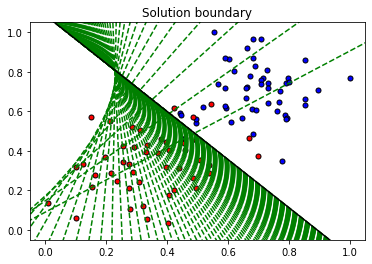

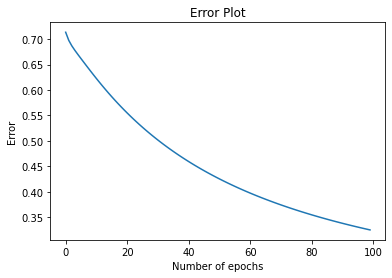

In [11]:
train(X, y, epochs, learnrate, True)